## 虫口模型 Logistic Map 2

迭代方程： $$x_{n+1}=r x_{n}(1-x_{n}) ，  x \in [0,1], r \in [0,4]$$

定义了一个简单的**确定性**的动力学过程。即只要给定初始值 $x_{0}$，就能够确切的知道迭代 $n$ 次后的值 $x_{n}$。

In [6]:
import matplotlib.pyplot as plt # 导入图形库
import numpy as np
%matplotlib inline

### 定义函数和动力学 

In [7]:
def LogisticMapFunction(x,r): # 定义 logistic map
    return r*x*(1-x)

def df(x,r): # 定义 logistic map 的导数
    return r-2*r*x

def f2(x,r): # f(f(x))
    x = LogisticMapFunction(x,r)
    x = LogisticMapFunction(x,r)
    return x
    
def f3(x,r): # f(f(f(x)))
    x = f2(x,r)
    x = LogisticMapFunction(x,r)
    return x


def LogisticMapDynamics(x,r,n): # x0,x1,x2,...,xn
    X = []
    Y = []
    for i in np.arange(0,n):
        X.append(i)
        Y.append(x)
        x = LogisticMapFunction(x,r)
    return np.array(X),np.array(Y)


    

### 函数图像
开口向下的抛物线

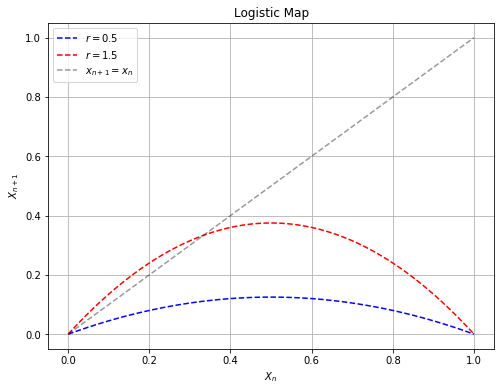

In [16]:
r1=0.5
r2=1.5
X = np.linspace(0,1,100)
Y1 = LogisticMapFunction(X,r1)
# Y1 = f2(X,3.3)
Y2 = LogisticMapFunction(X,r2)
Y3 = X

plt.figure(figsize=(8, 6))
plt.plot(X,Y1,'b--',label="$r=$"+str(r1))
plt.plot(X,Y2,'r--',label="$r=$"+str(r2))
plt.plot(X,Y3,'k--',label="$x_{n+1}=x_{n}$",alpha=0.4)
plt.xlabel("$X_{n}$")
plt.ylabel("$X_{n+1}$")
plt.title("Logistic Map")
#plt.axis([0.65,0.7,0.65,0.7])
plt.legend(loc=0)
plt.grid(True) #格线


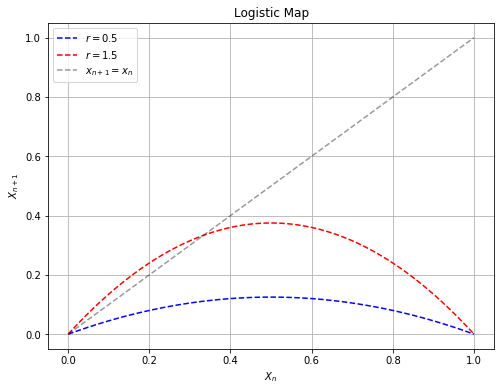

In [9]:
r1=0.5
r2=1.5
X = np.linspace(0,1,100)
Y1 = LogisticMapFunction(X,r1)
# Y1 = f2(X,3.3)
Y2 = LogisticMapFunction(X,r2)
Y3 = X

plt.figure(figsize=(8, 6))
plt.plot(X,Y1,'b--',label="$r=$"+str(r1))
plt.plot(X,Y2,'r--',label="$r=$"+str(r2))
plt.plot(X,Y3,'k--',label="$x_{n+1}=x_{n}$",alpha=0.4)
plt.xlabel("$X_{n}$")
plt.ylabel("$X_{n+1}$")
plt.title("Logistic Map")
#plt.axis([0.65,0.7,0.65,0.7])
plt.legend(loc=0)
plt.grid(True)

### 迭代动力学

给某个初值$x_0$启动迭代过程，长时间后，$x$ 会是什么值？请在如下参数下，画出 $x$ 随迭代步数 $n$的图像。

- $ r = 0.5 $


- $ r = 2 $  


- $ r=3.3 $  


- $ r=3.5 $  


- $ r=3.9 $ 


- 暂态和稳态
- 稳态的类型
- 临界慢化现象

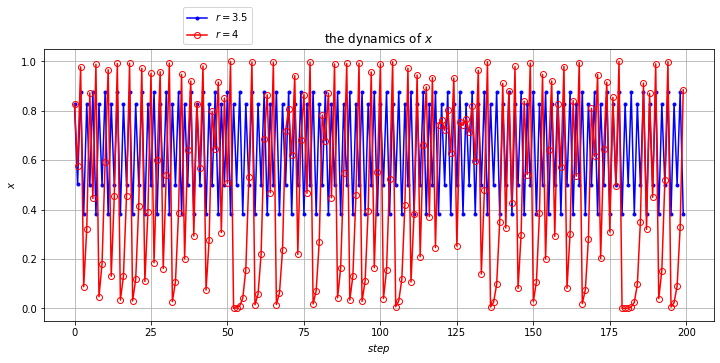

In [20]:
r1 = 3.5
r2 =4
x0 = np.random.rand(1) # 初始值
x1 = x0
x2 = x0
n = 200
X,Y1 = LogisticMapDynamics(x1,r1,n)
X,Y2 = LogisticMapDynamics(x2,r2,n)


#plt.xlim(0,50)

plt.figure(figsize=(12, 5))
plt.plot(X,Y1,'b.-',label="$r=$"+str(r1))
plt.plot(X,Y2,'ro-',markerfacecolor='none',label="$r=$"+str(r2))
plt.xlabel("$step$")
plt.ylabel("$x$")
plt.title("the dynamics of $x$")
plt.legend(bbox_to_anchor=(0.2,1.))
#plt.ylim(0.625,0.7)
#plt.xlim(150,200)
plt.grid(True)

### $x$ 分布图



(-5, 800)

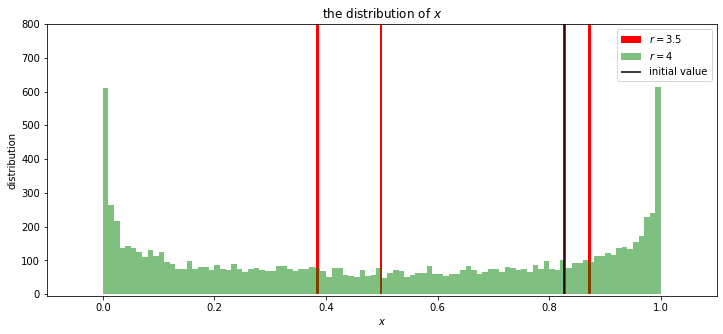

In [23]:
# r1,r2,x0 同上
x1 = x0
x2 = x0

n=1000 #迭代 n 次暂态

a,X1 = LogisticMapDynamics(x1,r1,n)
a,X2 = LogisticMapDynamics(x2,r2,n)

k=10000 # 记录下 k 次的结果，看其分布

a,XX1 = LogisticMapDynamics(X1[-1],r1,k)
a,XX2 = LogisticMapDynamics(X2[-1],r2,k)

plt.figure(figsize=(12, 5))

plt.hist(XX1,100, facecolor='red',alpha=1,label="$r=$"+str(r1))
plt.hist(XX2,100, facecolor='green',alpha=0.5,label="$r=$"+str(r2))
plt.vlines(x0,0,800,alpha=1,label="initial value")


plt.xlabel("$x$")
plt.ylabel("distribution")
plt.title("the distribution of $x$")
plt.legend(loc=0)
plt.xlim(-0.1,1.1)
plt.ylim(-5,800)
#plt.grid(True)

### 分岔图 （Bifurcation Diagram)

- 研究全参数空间 $r \in [0,4]$ 中，$x$ 长时间后的行为。
- 在分叉图中，$x$ 轴是参数$r \in [0,4]$；$y$ 轴是经过长时间迭代后$x$的值。
- 注意：如果去暂态不够长，会发生什么现象？如何解释？


#### 放大分叉图

放大分岔图的某些区域，会发现很有意思的现象。比如放大如下区域：

- $r \in [3.9055,3.907]$
- $r \in [3.847,3.857]$
- $r \in [3.8284,3.8415]$

### 周期一轨道（不动点）及其稳定性

不动点满足如下条件：$$x^{*}=rx^{*}(1-x^{*})$$



### 周期二轨道及其稳定性

周期二轨道满足如下条件：

$$ \left\{
\begin{array}{ll}
x_{2}^{*}  =rx_{1}^{*}(1-x_{1}^{*}) \\
x_{1}^{*}  =rx_{2}^{*}(1-x_{2}^{*})
\end{array}
\right.
$$

上面的方程组可以形式地写成：$x_{1}^{*}=f(f(x_{1}^{*}))$, 或者  $x_{2}^{*}=f(f(x_{2}^{*}))$，两者完全等价。换句话说，周期二轨道是函数 $f^2=f(f(x))$ 的不动点，即满足方程 $x=f^{2}(x)$ 的解。

以此类推，周期 $n$ 轨道就是方程 $x = f^{n}(x)$ 的解，其中 $f^n(x):=\overbrace{f(f(...f}^{n}(x)))$



### 周期轨道稳定性的几何解释

- 周期一轨道：画出 $y = f(x)$ 以及 $y=x$ 两条线；
- 周期二轨道：画出 $ y = f^2(x)$ 以及 $y = x$ 两条线；

### 初值敏感性：长期无法预测，内秉的随机性

跟踪两条轨道，一条初始值为 $x_0$, 另一条初始值为 $x_0$ 加上一个非常小的随机扰动，研究这两条轨道长时间后的取值。

#### 初值敏感性 -  分布

初始 $m$ 个 $x$ 值，每一个都等于 0.3 加上一个随机的 *小* 扰动,长时间后，这个$m$个点的命运如何？画出这$m$个点长时间之后的分布。 

### 李雅普诺夫指数 (Liapunov Exponent)

李雅普诺夫指数刻画系统相空间任意一条微扰的轨道以何种方式偏离原轨道。我们任意选择两条靠得很近的轨道，它们的初始状态分别为：$x_{0}$ 和 $x_{0}+ \delta x_{0}$，迭代 $n$ 次后，系统状态分别为 $x_{n}$ 和 $x_{n} + \delta x_{n}$。定义李雅普诺夫指数 $\lambda $，满足如下等式：

$$|\delta x_{0}|e^{\lambda n } :=\left|\delta x_{n}\right|$$，

两边去自然对数得：

$$\lambda = \frac{1}{n}\ln \left|\frac{\delta x_{n}}{\delta x_{0}}\right|$$

#### 另一种更稳定的算法

$$ \lambda = \frac{1}{n}\ln \left|\frac{\delta x_{n}}{\delta x_{0}}\right|$$


$$ =  \frac{1}{n}\ln \left|\frac{f^n(x_{0}+\delta x_{0})-f^n(x_{0})}{\delta x_{0}}\right|$$

$$ =  \frac{1}{n}\ln \left|(f^n)^{'}(x_{0})) \right|$$

$$ =  \frac{1}{n}\ln \left|\prod_{i=0}^{n-1} f^{'}(x_i) \right| $$

$$ =  \frac{1}{n}\sum_{i=0}^{n-1} \ln \left|f^{'}(x_i) \right| $$

### 第二次作业

注意 作业文件命名：2_LogisticMap_姓名.ipynb

- 自行补充一点 Logisitic Map 的背景知识。
- 画出 Logistic Map 分岔图，并分析。
- 画出 Logistic Map 的李雅普诺夫指数随$r$的变化图，并跟分岔图对比研究。
- 什么是 Feigenbaum 常数，查找资料总结一下。（可选）

In [ ]:
Logistic映射是研究动力系统、混沌、分形等复杂系统行为的一个经典模型。Logistic映射又叫Logistic迭代，其实就是一个时间离散的动力系统，
即按照如下方程进行反复迭代： 
 
其中，t为迭代时间步，对于任意的t，，为一可调参数，为了保证映射得到的始终位于[0,1]内，则。
当变化不同的参数的时候，该方程会展现出不同的动力学极限行为（即当t趋于无穷大，x(t)的变化情况），包括：
稳定点（即最终x(t)始终为同一个数值）、周期（x(t)会在2个或者多个数值之间跳跃，以及混沌：x(t)的终态不会重复，而会等概率地取遍某区间）。 
该模型可以用来模拟生物种群的生长行为，所以Logistic映射也叫“虫口模型”。
其中x(t)可以解释为在t时刻种群占最大可能种群规模的比例。我们将原方程变形为： 
 
其中左边可以解释为种群的生长率（即一个单位周期内，种群数量的变化）。
右侧第一项可以解释为虫种群的出生，第二项则为种群的消亡。
其中消亡项和有关，也就是说种群数量越多，消亡得越快，这体现为该种群内部由于资源有限而引起的竞争。

C:\Users\lyckyk\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


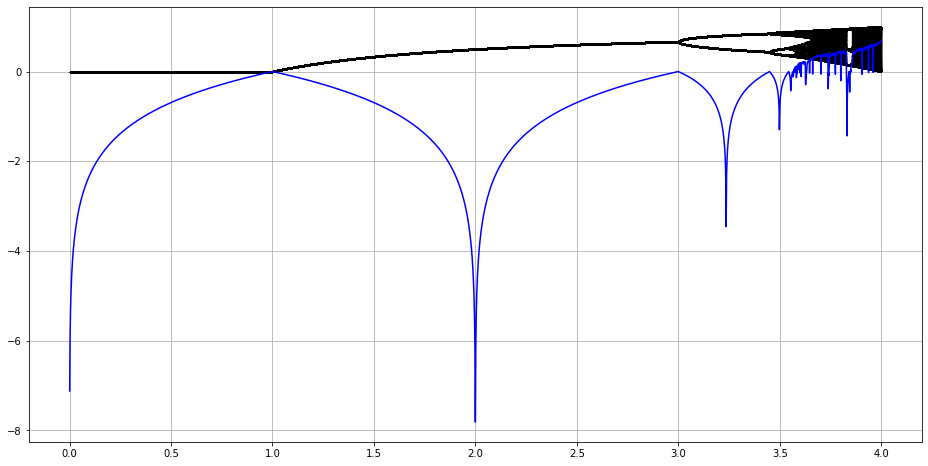

In [9]:
import matplotlib.pyplot as plt # 导入图形库
import numpy as np
%matplotlib inline

def logi(x,r):
    x=r*x*(1-x)
    return x

r=np.linspace(0,4,5000)
x=np.random.rand(len(r))
dx=np.zeros(len(r))

for i in np.arange(0,5000):
    x=logi(x,r)

plt.figure(figsize=(16, 8))
plt.grid(True)

for i in np.arange(0,1000):
    x=logi(x,r)
    plt.plot(r,x,'k.',markersize=0.1)
    dx=dx+np.log(np.abs(r-2*r*x))
    
dx=dx/1001

plt.plot(r,dx,'b')

In [ ]:
费根鲍姆常数是新近发现的、且在学术界认定的一个普适常数，这个常数与“混沌现象”有关。
其大小δ ≈4.66920 16091 02990 67185 32038 20466 20161 72581 85577 47576 86327 45651 34300 4134.....